## Assignment 5.1

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [2]:
from keras.datasets import imdb

#import IMDB dataset and create training and test data sets
#only keep top 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
#The variables train_data and test_data are lists of reviews
#list of word indices
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:
train_labels[0]

1

In [5]:
#no word index will go above 10,000 given top frequent
max([max(sequence) for sequence in train_data])

9999

In [6]:
#example of how to decode review back to english words
word_index = imdb.get_word_index()                                    
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])            
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
#vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #creates an all-zero matrix
    results = np.zeros((len(sequences), dimension)) 
    #sets specific indices to 1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

#vectorize training and test data
x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)    

In [8]:
#also need to vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
#defining the Dense layers model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#compiling the model
#binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#training the model for 20 epochs in mini batches of 512 samples
#monitor loss and accuracy on hold-out set
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4917 - accuracy: 0.7948 - val_loss: 0.3675 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 2s 50ms/step - loss: 0.2928 - accuracy: 0.9046 - val_loss: 0.3010 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2130 - accuracy: 0.9329 - val_loss: 0.2751 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1700 - accuracy: 0.9460 - val_loss: 0.2906 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1361 - accuracy: 0.9566 - val_loss: 0.2846 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1132 - accuracy: 0.9658 - val_loss: 0.3054 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0949 - accuracy: 0.9709 - val_loss: 0.3270 - val_accuracy: 0.8816
Epoch 8/20
30

In [13]:
#tracking what happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

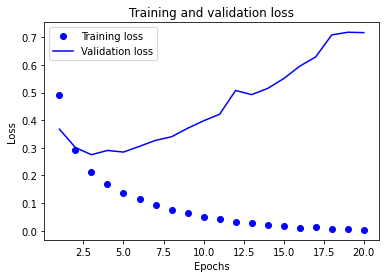

In [14]:
#plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


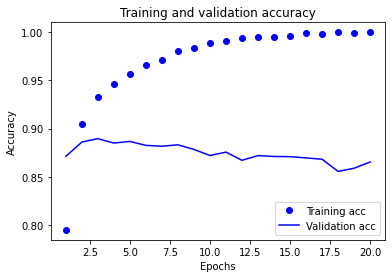

In [15]:
#plotting the training and validation accuracy

plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
#preventing overfitting
#retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4365 - accuracy: 0.8227
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2509 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2948 - accuracy: 0.8841


In [17]:
results

[0.2948001027107239, 0.8840799927711487]

Accuracy: 88.7%

In [18]:
#generating likelihood of reviews being positive
model.predict(x_test)

array([[0.17842832],
       [0.9998101 ],
       [0.9237543 ],
       ...,
       [0.11582085],
       [0.06426579],
       [0.614456  ]], dtype=float32)

## Assignment 5.2

Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [19]:
#loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [20]:
#looking at number of examples
#each example is a list of word indeices --> similar to imdb
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
#decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])  

In [23]:
#The label associated with an example is an integer between 0 and 45—a topic index
train_labels[5]

4

In [24]:
#encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)   

In [25]:
#encoding labels with one-hot encoding
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [26]:
#defining the model with larger layers to avoid information bottleneck
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
#compiling the model
#using categorical crossentropy
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#setting a side a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
#training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 2.6655 - accuracy: 0.5495 - val_loss: 1.7810 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4406 - accuracy: 0.7097 - val_loss: 1.3044 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0519 - accuracy: 0.7806 - val_loss: 1.1218 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8179 - accuracy: 0.8264 - val_loss: 1.0209 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6546 - accuracy: 0.8668 - val_loss: 0.9572 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5235 - accuracy: 0.8941 - val_loss: 0.9332 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4222 - accuracy: 0.9146 - val_loss: 0.8847 - val_accuracy: 0.8160
Epoch 8/20
16

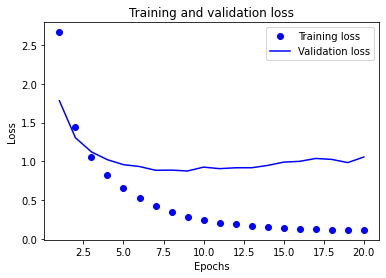

In [30]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

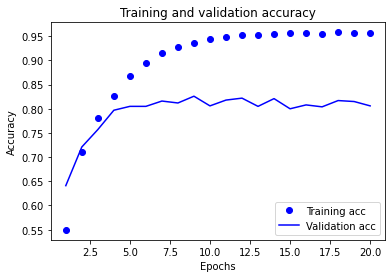

In [31]:
#plotting the training and validation accuracy
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
#model begins to overfit after nine ephochs
#retrain
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.6088 - accuracy: 0.5517 - val_loss: 1.6954 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.3930 - accuracy: 0.7135 - val_loss: 1.2786 - val_accuracy: 0.7260
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0297 - accuracy: 0.7752 - val_loss: 1.1457 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8132 - accuracy: 0.8227 - val_loss: 1.0250 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6495 - accuracy: 0.8627 - val_loss: 0.9844 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5151 - accuracy: 0.8918 - val_loss: 0.9407 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4170 - accuracy: 0.9128 - val_loss: 0.9414 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [33]:
results

[0.9724915623664856, 0.7894033789634705]

In [34]:
#This approach reaches an accuracy of ~80%. 
#With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. 
#But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [35]:
#generating topic predictions for all of the test dat
predictions = model.predict(x_test)

In [36]:
#each entry is a vector of length 46
predictions[0].shape

(46,)

In [37]:
#coefficients in vector sum to one
np.sum(predictions[0])

0.99999994

In [38]:
#class with highest probability
np.argmax(predictions[0])

3

In [39]:
#model with an information bottleneck --> testing
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 3.3175 - accuracy: 0.2340 - val_loss: 2.7321 - val_accuracy: 0.3910
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.3907 - accuracy: 0.4014 - val_loss: 2.1611 - val_accuracy: 0.4030
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.8395 - accuracy: 0.4668 - val_loss: 1.6427 - val_accuracy: 0.5940
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4203 - accuracy: 0.6219 - val_loss: 1.4514 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2465 - accuracy: 0.6845 - val_loss: 1.3859 - val_accuracy: 0.6680
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1395 - accuracy: 0.7170 - val_loss: 1.3730 - val_accuracy: 0.6740
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0624 - accuracy: 0.7283 - val_loss: 1.3859 - val_accuracy: 0.6780
Epoch 8/20
63/63 [==

Validation accuracy has an ~8% drop --> trying to cram information into smaller space

## Assignment 5.3

Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

In [40]:
#loading the Boston housing dataset
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [41]:
#looking at the data
train_data.shape

(404, 13)

In [42]:
test_data.shape

(102, 13)

Much smaller overall dataset size!

In [43]:
#targets are the median values of owner-occupied homes
train_targets
#The prices are typically between $10,000 and $50,000

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [44]:
#normalizing the data
#subtract the mean of the feature and divide by std (standard deviation)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [45]:
#model definition, small network and a linear layer
#compile the network with mse loss function - mean squared error
#mean absolute error (MAE)
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [46]:
#validation with k-fold cross validation since dataset size is small
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [47]:
#num_epochs = 100 results
all_scores

[2.110060214996338, 2.3717103004455566, 2.7347095012664795, 2.40783429145813]

In [48]:
np.mean(all_scores)

#off by about $2,400 --> pretty significant given the small range of price values for the target

2.406078577041626

In [51]:
#try training a network a bit longer --> 500 epochs
#save validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [52]:
#average of per-epoch MAE scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

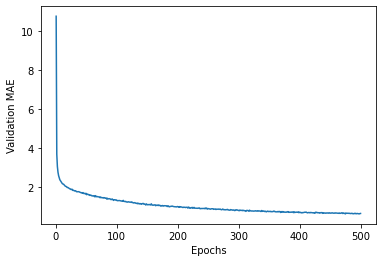

In [53]:
#plotting validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

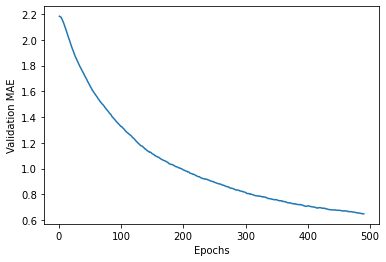

In [55]:
#plotting validation scores while excluding first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [57]:
#training final production model on all of the training data
#stops improving significantly after 80 epochs
model = build_model()                                                     
model.fit(train_data, train_targets,                                      
          epochs=80, batch_size=16, verbose=0) 
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 17.1928 - mae: 2.6661


In [58]:
#final result
test_mae_score

2.6661436557769775

Still off by about $2,666 which is actually higher than model with 100 epochs